In [123]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

df_accidents = pd.read_pickle("accidents.pkl.gz")
df_vehicles = pd.read_pickle("vehicles.pkl.gz")

# Hypoteza 1
Na silnicích první třídy se byly nehody s následky na zdraví se stejnou pravděpodobností
jako na dálnicích.

* `p36`: Udává typ silnice (0 = dálnice, 1 = silnice první třídy, 2-8 = jiné typy silnic).
* `p9`: Udává výsledek nehody (1 = zdravotní následky, 2 = materiální škody).


In [74]:
filtered_df_accidents = df_accidents[df_accidents['p36'].isin([0,1])]
contingency_table_accidents = pd.crosstab(filtered_df_accidents['p36'], filtered_df_accidents['p9'])

Používáme chi-kvadrát test k ověření, zda se rozdělení nehod se zdravotními následky významně liší mezi dálnicemi a silnicemi první třídy.


In [75]:
chi2, p, dof, expected = chi2_contingency(contingency_table_accidents)

Nastavíme hladinu významnosti \($\alpha$ = 0,05\). Pokud je p-hodnota menší než \($\alpha$), zamítáme nulovou hypotézu.


In [76]:
alpha = 0.05
reject_null = p < alpha

if reject_null:
    result = "Zamítáme nulovou hypotézu: Existuje významný rozdíl v pravděpodobnosti nehod se zdravotními následky mezi dálnicemi a silnicemi první třídy."
else:
    result = "Nezamítáme nulovou hypotézu: Neexistuje žádný významný rozdíl v pravděpodobnosti nehod se zdravotními následky mezi dálnicemi a silnicemi první třídy."

print("\nZávěr:")
print(result)


Závěr:
Zamítáme nulovou hypotézu: Existuje významný rozdíl v pravděpodobnosti nehod se zdravotními následky mezi dálnicemi a silnicemi první třídy.


# Hypoteza 2
Škoda při nehodách trolejbusů je nižší, než při nehodách autobusů a tato odchylka je
statisticky významná.

* `p45a`: Udává typ vozidla (8 = autobus, 11 = trolejbus).  
* `p53`: Udává škodu na nehodě ve stovkách Kč.


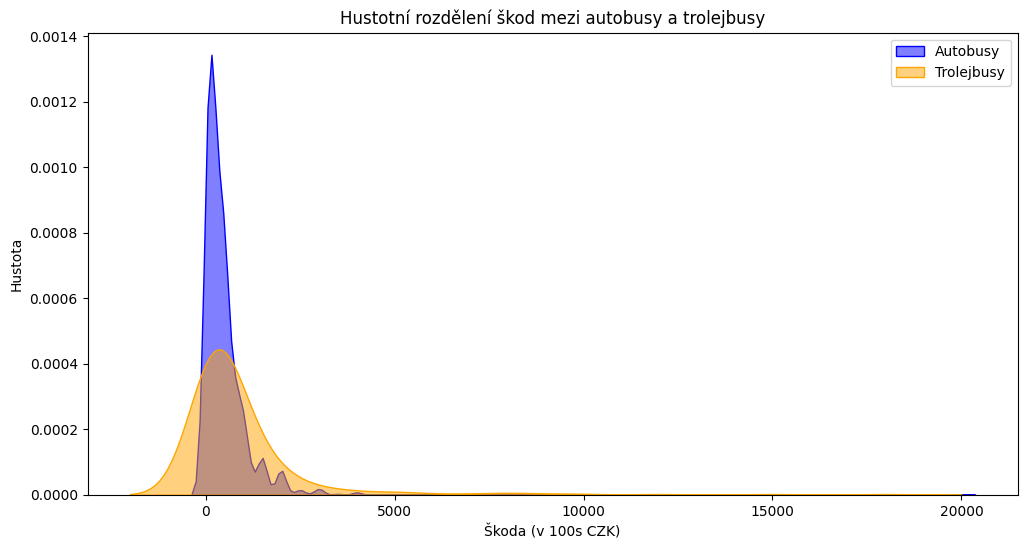

In [77]:
filtered_df_vehicles = df_vehicles[df_vehicles['p45a'].isin([8,11])]
autobusy = filtered_df_vehicles[filtered_df_vehicles['p45a'] == 8]['p53']
trolejbusy = filtered_df_vehicles[filtered_df_vehicles['p45a'] == 11]['p53']

plt.figure(figsize=(12, 6))
sns.kdeplot(autobusy, fill=True, color='blue', label='Autobusy', alpha=0.5)
sns.kdeplot(trolejbusy, fill=True, color='orange', label='Trolejbusy', alpha=0.5)

plt.title('Hustotní rozdělení škod mezi autobusy a trolejbusy')
plt.xlabel('Škoda (v 100s CZK)')
plt.ylabel('Hustota')
plt.legend()
plt.show()

Data nejsou normálně rozložena, proto použijeme Mann-Whitneyho U test.


In [78]:
stat, p_value = mannwhitneyu(autobusy, trolejbusy, alternative='two-sided')

In [79]:
alpha = 0.05
if p_value < alpha:
    print("Rozdíl mezi skupinami je statisticky významný.")
    mean_autobusy = autobusy.mean()
    mean_trolejbusy = trolejbusy.mean()
    if mean_autobusy > mean_trolejbusy:
        print("Škoda je vyšší u autobusů.")
    else:
        print("Škoda je vyšší u trolejbusů.")
else:
    print("Rozdíl mezi skupinami není statisticky významný.")

Rozdíl mezi skupinami je statisticky významný.
Škoda je vyšší u trolejbusů.
